In [4]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("../../")
from didgelab.analysis import *

#saved_evolutions/evolution_operations.jsonl.gz
indir = "../../../saved_evolutions/2024-04-20T11-50-54_evolve_tamaki3/"

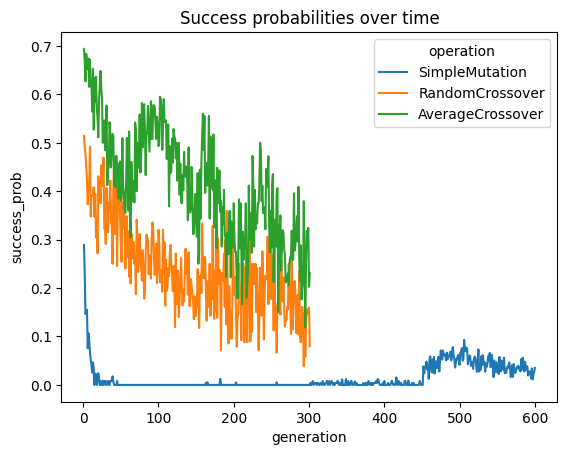

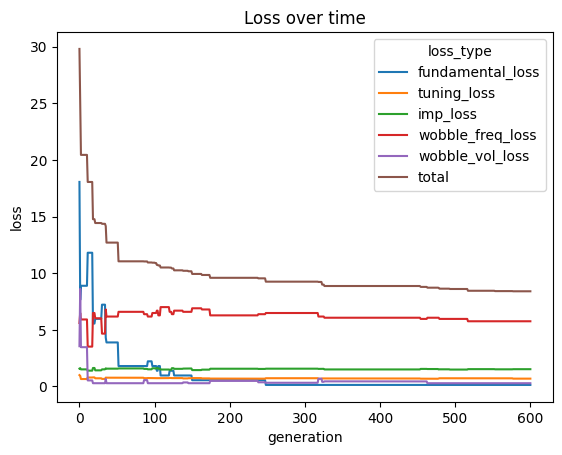

In [5]:
infile = os.path.join(indir, "evolution_operations.jsonl.gz")
nodes = build_graph(infile)
deltas = get_deltas(nodes)
plot_success_probs_over_time(deltas)
plt.show()
plot_loss_over_time(nodes)

************************
Individual 0
************************


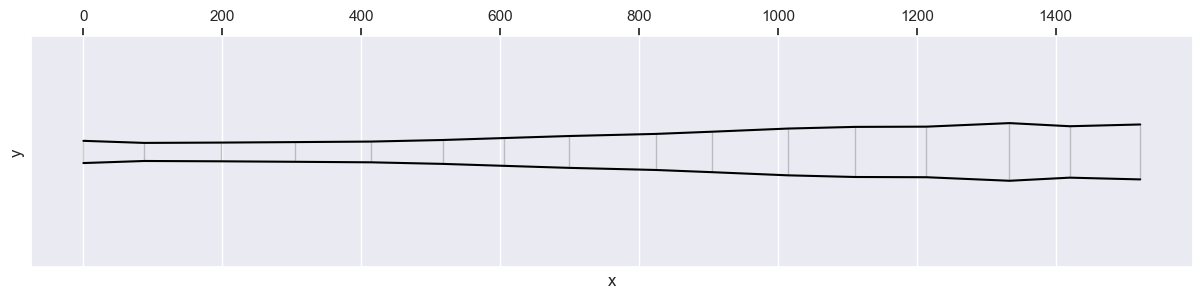

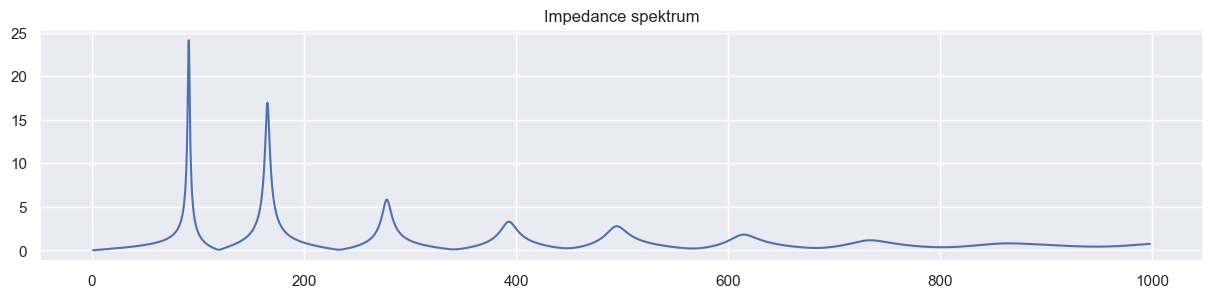

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0       F#1     -22.63      -27   91.30      24.15     1.00
1        E2       7.37      -17  165.52      16.97     0.70
2       C#3       7.37       -8  278.36       5.83     0.24
3        G3       7.37       -2  393.67       3.30     0.14
4        B4       2.37        2  494.56       2.78     0.12
5       D#4     -22.63        6  614.17       1.82     0.08
6       F#4     -12.63        9  734.61       1.17     0.05
7        A5     -27.63       12  866.07       0.81     0.03
Impedance sum: 56.83
Volume: 80.32 cm3
Length: 152.16 cm
Bell diameter: 7.91 cm

************************
Individual 1
************************


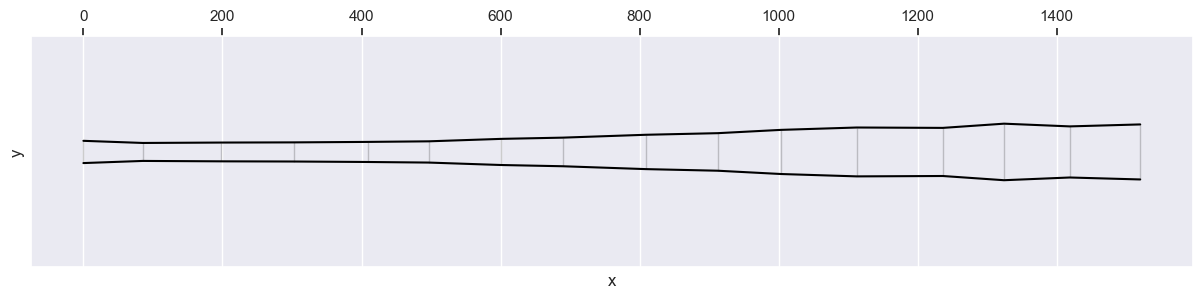

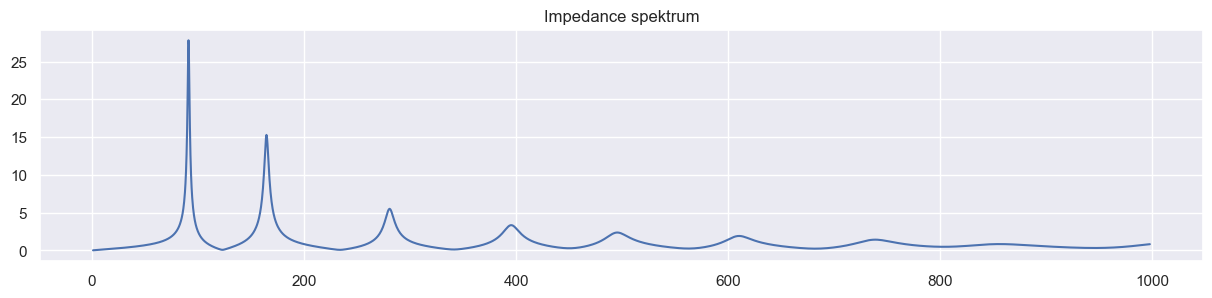

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0       F#1     -27.63      -27   91.03      27.82     1.00
1        E2      -2.63      -17  164.56      15.30     0.55
2       C#3      22.37       -8  280.79       5.51     0.20
3        G3      17.37       -2  395.95       3.34     0.12
4        B4       7.37        2  495.99       2.36     0.09
5       D#4     -32.63        6  610.64       1.91     0.07
6       F#4      -2.63        9  738.86       1.42     0.05
7        A5     -47.63       12  856.12       0.84     0.03
Impedance sum: 58.49
Volume: 77.06 cm3
Length: 152.00 cm
Bell diameter: 7.91 cm

************************
Individual 2
************************


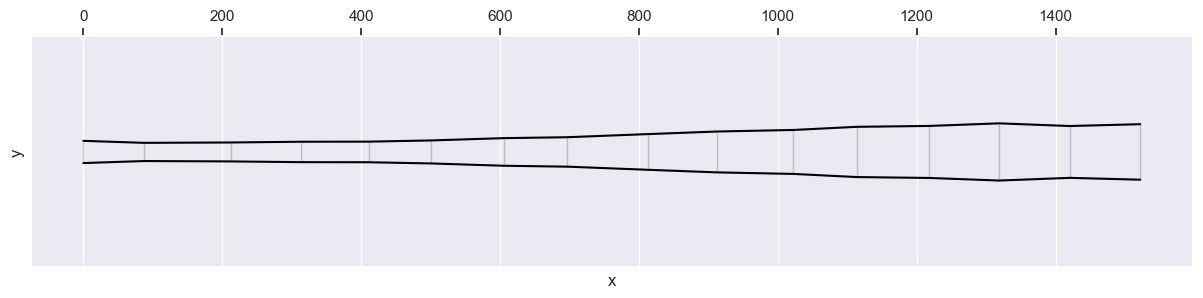

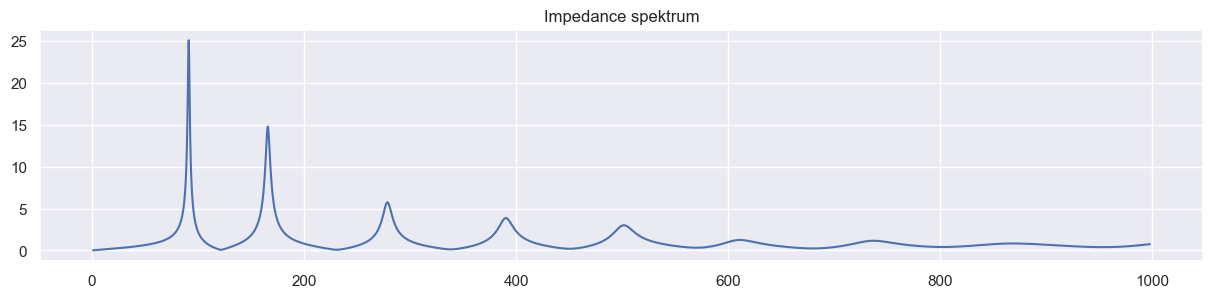

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0       F#1     -22.63      -27   91.30      25.09     1.00
1        E2      12.37      -17  166.00      14.80     0.59
2       C#3       7.37       -8  278.36       5.75     0.23
3        G3      -7.63       -2  390.27       3.87     0.15
4        B4      27.37        2  501.75       3.01     0.12
5       D#4     -32.63        6  610.64       1.25     0.05
6       F#4      -7.63        9  736.73       1.16     0.05
7        A5     -22.63       12  868.57       0.83     0.03
Impedance sum: 55.75
Volume: 79.78 cm3
Length: 152.19 cm
Bell diameter: 7.99 cm



In [10]:
infile = "../../../saved_evolutions/test/tamaki_pop.json"
population = json.load(open(infile))["population"]

def visualize_individuals(population, n=None, base_freq=440):

    if n is not None and n<len(population):
        population = population[0:n]

    for i in range(len(population)):
        geo = population[i]["representation"]["geo"]
        geo = Geo(geo)
        freqs = get_log_simulation_frequencies(1, 1000, 5)
        segments = create_segments(geo)
        impedance = compute_impedance(segments, freqs)
        notes = get_notes(freqs, impedance, base_freq=base_freq)
        print("************************")
        print(f"Individual {i}")
        print("************************")
        vis_didge(geo)
        plt.show()
        plt.plot(freqs, impedance)
        plt.title("Impedance spektrum")
        plt.show()
        print(notes.round(2))
        print(f"Impedance sum: {notes.impedance.sum():.2f}")
        print(f"Volume: {geo.compute_volume()/1000:.2f} cm3")
        print(f"Length: {geo.geo[-1][0]/10:.2f} cm")
        print(f"Bell diameter: {geo.geo[-1][1]/10:.2f} cm")
        print()

visualize_individuals(population, n=3)

In [8]:
population

{'generation': 100,
 'population': [{'genome': [0.020085790477701555,
    0.9400957486705783,
    0.1816453358788233,
    0.4543702576154167,
    0.41569268715088914,
    0.15281569316392155,
    0.0,
    0.37664344225212776,
    0.0,
    0.49680429778806556,
    0.006587327239088768,
    0.7029068434473782,
    0.0,
    0.7520184217120583,
    0.16671357267044262,
    0.44044379657225446,
    0.3620439998078543,
    0.21205918863964954,
    0.5232134329233622,
    0.8082726553991859,
    0.6646985989636034,
    0.30941475150172537,
    0.7873997253320169,
    0.5,
    1.0,
    0.385976738694614,
    0.9944934517491182,
    0.41263085693569745,
    0.8180381663558594,
    0.8660295817953396,
    1.0],
   'loss': {'fundamental_loss': 0.971279287740412,
    'tuning_loss': 0.7243776469267449,
    'imp_loss': 1.471116235114955,
    'wobble_freq_loss': 6.5893319348886426,
    'wobble_vol_loss': 0.2889760295752919,
    'total': 10.045081134246047},
   'representation': {'geo': [[0.0, 32.0],
